In [2]:
import numpy as np
import pickle
import tensorflow as tf
tf.reset_default_graph()

In [3]:
with open('Training_feature.pickle','rb') as f:
    training_feature=pickle.load(f,encoding='latin1')
input_images=training_feature[0]
class_labels=training_feature[1]    

training_percentage=80

X_train=input_images[:int((len(input_images)/100)*training_percentage)].astype(float)
Y_train=class_labels[:int((len(input_images)/100)*training_percentage)].astype(float)
X_test=input_images[int((len(input_images)/100)*training_percentage):].astype(float)
Y_test=class_labels[int((len(input_images)/100)*training_percentage):].astype(float)

## Define placeholder and variables

In [4]:
no_hidden_layer1=1000
no_of_class=3
h_epochs=100
X=tf.placeholder(tf.float32,[None,2500])
Y=tf.placeholder(tf.float32)

sess=tf.InteractiveSession()
with tf.name_scope('hidden1'):
    W=tf.Variable(tf.truncated_normal([2500,no_hidden_layer1],stddev=0.1),name='weights')
    bias=tf.Variable(tf.zeros([no_hidden_layer1]),dtype=tf.float32,name='bias')
    hidden_layer1_output=tf.add(tf.matmul(X,W),bias)
    hidden_layer1_output=tf.nn.relu(hidden_layer1_output)
    

with tf.name_scope('out_put'):
    W=tf.Variable(tf.truncated_normal([no_hidden_layer1,no_of_class],stddev=0.1),name='weights')
    bias=tf.Variable(tf.zeros([no_of_class]),dtype=tf.float32,name='bias')
    output_logits=tf.add(tf.matmul(hidden_layer1_output,W),bias)

with tf.name_scope('loss'):
    cross_entropy=tf.nn.softmax_cross_entropy_with_logits(logits=output_logits,labels=Y,name='cross_entropy')
    loss = tf.reduce_mean(cross_entropy, name='xentropy_mean')
    tf.summary.scalar('loss',loss)
    
with tf.name_scope('train'):
    optimizer=tf.train.AdamOptimizer(0.001)
    train_op=optimizer.minimize(loss)
    
with tf.name_scope('accuracy'):
    prediction=tf.equal(tf.argmax(output_logits,1),tf.argmax(Y,1))
    accuracy=tf.reduce_mean(tf.cast(prediction,dtype=tf.float32))    
    tf.summary.scalar('accuracy',accuracy)
merged=tf.summary.merge_all()    

In [5]:
train_writer=tf.summary.FileWriter('/home/ppatnaik/pradosa/logdir1'+'/train',sess.graph)
test_writer=tf.summary.FileWriter('/home/ppatnaik/pradosa/logdir1'+'/test',sess.graph)
# tf.global_variables_initializer().run()

In [7]:
# with tf.Session() as sess:
sess.run(tf.global_variables_initializer())
c=[]
for i in range(h_epochs):
    _,cost,m=sess.run([train_op,loss,merged],{X:X_train,Y:Y_train})
    train_writer.add_summary(m, i)
    c.append(cost)
    #         print(cost)
print(accuracy.eval(feed_dict={X:X_test,Y:Y_test}))      

0.308642


In [25]:
m

b'\n\x10\n\tloss/loss\x15;\xa3\xd6B\n\x18\n\x11accuracy/accuracy\x15wN\x1f?'

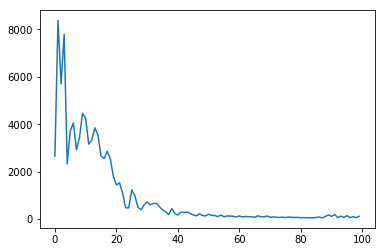

In [8]:
import matplotlib.pyplot as plt
plt.plot(c)
plt.show()

In [27]:
with tf.Session() as sess:
    summary=tf.summary.FileWriter('/home/ppatnaik/pradosa/logdir1')
    summary.add_graph(sess.graph)

In [9]:
c

[2647.1621,
 8388.7139,
 5697.4731,
 7800.0356,
 2326.7993,
 3707.3894,
 4053.3567,
 2920.9688,
 3452.2334,
 4459.6045,
 4241.3804,
 3156.939,
 3334.6179,
 3845.5442,
 3544.6184,
 2660.7908,
 2545.7461,
 2857.1201,
 2553.4531,
 1795.7086,
 1432.6445,
 1520.6283,
 1097.7621,
 472.34457,
 460.8811,
 1227.281,
 984.43134,
 490.63379,
 380.17963,
 595.55182,
 716.85046,
 593.99939,
 652.80914,
 653.90863,
 509.36938,
 381.31308,
 304.40793,
 180.30995,
 432.09506,
 229.9809,
 166.04662,
 283.49927,
 268.23486,
 289.59631,
 232.62665,
 166.63144,
 129.17844,
 215.73218,
 138.89093,
 126.92519,
 192.17062,
 149.85841,
 141.99606,
 94.921951,
 166.93488,
 85.133537,
 124.8046,
 118.44506,
 108.65344,
 84.106766,
 123.25998,
 80.156845,
 101.0034,
 92.300423,
 94.644913,
 63.200172,
 128.77272,
 89.047653,
 89.21151,
 118.30508,
 65.808197,
 84.993721,
 68.357056,
 59.557438,
 72.33477,
 56.673599,
 76.534149,
 60.978527,
 58.539421,
 65.147949,
 44.731926,
 52.109455,
 48.563713,
 47.705887,
